# Ejercicio2

### Paso 1: Librerías y requerimientos

In [13]:
!pip install patsy

In [61]:
### Instalar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path
import patsy
import warnings
warnings.simplefilter('ignore')
np.random.seed(1234)

### Paso 2: Leer la data y quedarnos con aquiellos sin missnig values

In [ ]:
df = pd.read_excel("../input/Districtwise_literacy_rates.xlsx", sheet_name=0)
df= df.dropna()
df.head(5)


,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
0,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564.0,11.33,197001.90,...,23,852,239,2708,5205,43,70,28,1065,638
1,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503.0,17.19,161871.18,...,30,1665,360,2937,5873,236,60,105,2533,964
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751.0,98.73,155798.45,...,0,2873,40,828,3647,1159,14,0,4757,129
3,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753.0,11.74,150755.79,...,8,1035,325,1878,3892,250,68,19,1493,716
4,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060.0,13.80,97651.28,...,5,1101,209,1336,2682,113,90,38,1414,506
5,1,106,JAMMU & KASHMIR,ANANTNAG,1,12,523,1070144.0,26.04,206323.76,...,22,1592,185,2084,6182,261,74,95,2491,597
6,1,107,JAMMU & KASHMIR,LEH (LADAKH),1,6,110,147104.0,42.96,11812.45,...,17,473,0,470,1160,62,19,45,813,0
7,1,108,JAMMU & KASHMIR,KARGIL,1,7,134,143388.0,8.89,20404.11,...,3,220,99,471,1582,90,44,17,274,288
8,1,109,JAMMU & KASHMIR,DODA,1,10,388,409576.0,7.95,71020.48,...,36,766,36,1867,3010,266,41,172,1391,102
9,1,110,JAMMU & KASHMIR,UDHAMPUR,1,11,361,555357.0,19.72,82637.12,...,22,1151,6,2159,3069,811,27,118,1638,32


### Paso 3: Histograma del literaacity hombres y Literacity mujeres

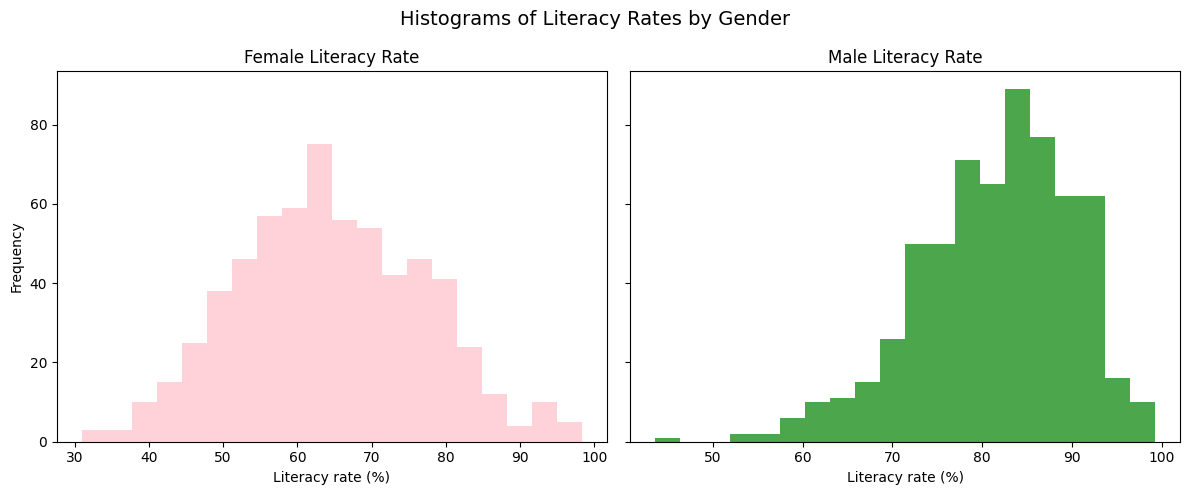

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

axes[0].hist(df["FEMALE_LIT"], bins=20, color="pink", alpha=0.7)
axes[0].set_title("Female Literacy Rate")
axes[0].set_xlabel("Literacy rate (%)")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["MALE_LIT"], bins=20, color="green", alpha=0.7)
axes[1].set_title("Male Literacy Rate")
axes[1].set_xlabel("Literacy rate (%)")

plt.suptitle("Histograms of Literacy Rates by Gender", fontsize=14)
plt.tight_layout()
plt.show()

##### En este caso se ve claramente que la tasa de alfabetización en promedio tiene una distribución con una media centrada alrededor de 80 en los hombres y de 60 en las mujeres, siendo además en el caso femenino una distribución con cola a la izquierda y con la mayor cantidad de observaciones hacia valores más bajos. Esto contrasta con la distribución masculina, más concentrada y en niveles más elevados. Todo ello refleja la brecha de género que sigue existiendo en ese país respecto a la tasa de alfabetización, la cual probablemente se manifieste también en muchas otras áreas.

### Paso 4: Estimación de una especificación de baja dimensión y cálculo del 𝑅2 en el set de prueba

In [31]:
y = df['FEMALE_LIT']   
Z = df.drop([
    'FEMALE_LIT',   # variable objetivo
    'STATCD',       # código de estado (ID, no explicativo)
    'DISTCD',       # código de distrito (ID, no explicativo)
    'STATNAME',     # nombre de estado (solo texto)
    'DISTNAME',     # nombre de distrito (solo texto)
    'DISTRICTS',    # número de distritos (no útil a nivel distrito)
    'BLOCKS',       # número de bloques administrativos
    'VILLAGES' ,     # número de aldeas
    'OVERALL_LI'  ,  # multicolinealidad perfecta practicamente
    'AREA_SQKM'     # area del 
], axis=1)
Z.columns


Index(['TOTPOPULAT', 'P_URB_POP', 'POPULATION_0_6', 'GROWTHRATE', 'SEXRATIO',
       'P_SC_POP', 'P_ST_POP', 'MALE_LIT', 'TOT_6_10_15', 'TOT_11_13_15',
       'SCH1', 'SCH2', 'SCH3', 'SCH4', 'SCH5', 'SCH6', 'SCH7', 'SCH9',
       'SCHTOT', 'SCH1G', 'SCH2G', 'SCH3G', 'SCH4G', 'SCH5G', 'SCH6G', 'SCH7G',
       'SCH9G', 'SCHTOTG', 'SCH1P', 'SCH2P', 'SCH3P', 'SCH4P', 'SCH5P',
       'SCH6P', 'SCH7P', 'SCH9P', 'SCHTOTP', 'SCH1GR', 'SCH2GR', 'SCH3GR',
       'SCH4GR', 'SCH5GR', 'SCH6GR', 'SCH7GR', 'SCH9GR', 'SCHTOTGR', 'SCH1PR',
       'SCH2PR', 'SCH3PR', 'SCH4PR', 'SCH5PR', 'SCH6PR', 'SCH7PR', 'SCH9PR',
       'SELE1', 'SELE2', 'SELE3', 'SELE4', 'SELE5', 'SELE6', 'SELE7', 'SCOMP1',
       'SCOMP2', 'SCOMP3', 'SCOMP4', 'SCOMP5', 'SCOMP6', 'SCOMP7', 'ENR501',
       'ENR502', 'ENR503', 'ENR504', 'ENR505', 'ENR506', 'ENR507', 'ENR509',
       'CLS1', 'CLS2', 'CLS3', 'CLS4', 'CLS5', 'CLS6', 'CLS7', 'TCH1', 'TCH2',
       'TCH3', 'TCH4', 'TCH5', 'TCH6', 'TCH7'],
      dtype='object')

In [41]:
formula = '0 + TOTPOPULAT + P_URB_POP + POPULATION_0_6 + GROWTHRATE + SEXRATIO + P_SC_POP + P_ST_POP + MALE_LIT + TOT_6_10_15 + TOT_11_13_15 + SCH1 + SCH2 + SCH3 + SCH4 + SCH5 + SCH6 + SCH7 + SCH9 + SCHTOT + SCH1G + SCH2G + SCH3G + SCH4G + SCH5G + SCH6G + SCH7G + SCH9G + SCHTOTG + SCH1P + SCH2P + SCH3P + SCH4P + SCH5P + SCH6P + SCH7P + SCH9P + SCHTOTP + SCH1GR + SCH2GR + SCH3GR + SCH4GR + SCH5GR + SCH6GR + SCH7GR + SCH9GR + SCHTOTGR + SCH1PR + SCH2PR + SCH3PR + SCH4PR + SCH5PR + SCH6PR + SCH7PR + SCH9PR + SELE1 + SELE2 + SELE3 + SELE4 + SELE5 + SELE6 + SELE7 + SCOMP1 + SCOMP2 + SCOMP3 + SCOMP4 + SCOMP5 + SCOMP6 + SCOMP7 + ENR501 + ENR502 + ENR503 + ENR504 + ENR505 + ENR506 + ENR507 + ENR509 + CLS1 + CLS2 + CLS3 + CLS4 + CLS5 + CLS6 + CLS7 + TCH1 + TCH2 + TCH3 + TCH4 + TCH5 + TCH6 + TCH7'
Zbase = patsy.dmatrix(formula, Z, return_type='dataframe')
Zbase = StandardScaler().fit_transform(Zbase)

#### Dado que estamos usando Folds no es necesario separar un conjunto de prueba y tests porque el comando ya los crea los compara y nos devuelve el r2 medio

In [44]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
rsquares = cross_val_score(LassoCV(cv=cv), Zbase, y, scoring='r2', cv=cv, n_jobs=-1)
print('Modelo base R^2 (Lasso): ', f'{np.mean(rsquares):.4f}')

Modelo base R^2 (Lasso):  0.8553


### Paso 5: Estime una especificación de alta dimensión (flexible): términos de interacción y términos al cuadrado y calcule el R2 


#### Use PolynomialFeatures por la cantidad de interacciones que tendríamos que generar, era más conveniente que usar patsy, además un detalle importante es que tuve que no incluir las interacciones porque eran 129 mil regresores y no alcanzó el poder computacional

In [ ]:
# Lista de variables base
base_vars = [
    "TOTPOPULAT","P_URB_POP","POPULATION_0_6","GROWTHRATE","SEXRATIO",
    "P_SC_POP","P_ST_POP","MALE_LIT","TOT_6_10_15","TOT_11_13_15",
    "SCH1","SCH2","SCH3","SCH4","SCH5","SCH6","SCH7","SCH9","SCHTOT",
    "SCH1G","SCH2G","SCH3G","SCH4G","SCH5G","SCH6G","SCH7G","SCH9G","SCHTOTG",
    "SCH1P","SCH2P","SCH3P","SCH4P","SCH5P","SCH6P","SCH7P","SCH9P","SCHTOTP",
    "SCH1GR","SCH2GR","SCH3GR","SCH4GR","SCH5GR","SCH6GR","SCH7GR","SCH9GR","SCHTOTGR",
    "SCH1PR","SCH2PR","SCH3PR","SCH4PR","SCH5PR","SCH6PR","SCH7PR","SCH9PR",
    "SELE1","SELE2","SELE3","SELE4","SELE5","SELE6","SELE7",
    "SCOMP1","SCOMP2","SCOMP3","SCOMP4","SCOMP5","SCOMP6","SCOMP7",
    "ENR501","ENR502","ENR503","ENR504","ENR505","ENR506","ENR507","ENR509",
    "CLS1","CLS2","CLS3","CLS4","CLS5","CLS6","CLS7",
    "TCH1","TCH2","TCH3","TCH4","TCH5","TCH6","TCH7"
]

X = Z[base_vars]

#Generamos todas las columnas (potencias + interacciones)
poly = PolynomialFeatures(degree=3, include_bias=False)  
X_poly = poly.fit_transform(X)
names = poly.get_feature_names_out(base_vars)

#Solo nos quedaremos con potencias porque con1 129 mil regresores no aguantaba el poder computacional
# Nos quedamos solo con monomios: nombres SIN espacios (los espacios indican interacciones)
mask_monomios = np.array([' ' not in n for n in names])
X_powers = X_poly[:, mask_monomios]
names_powers = names[mask_monomios]

print("Total features generadas:", len(names))
print("Solo potencias (x, x^2, x^3):", len(names_powers))

scaler = StandardScaler().fit(X_powers)
Zbase_flex = scaler.transform(X_powers)

print("Shape final sin interacciones:", Zbase_flex.shape)

Total features generadas: 129765
Solo potencias (x, x^2, x^3): 270
Shape final sin interacciones: (625, 270)


In [59]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
rsquares = cross_val_score(LassoCV(cv=cv), Zbase_flex, y, scoring='r2', cv=cv, n_jobs=-1)
print('Modelo base R^2 (Lasso): ', f'{np.mean(rsquares):.4f}')

Modelo base R^2 (Lasso):  0.8789


#### Podemos observar que el modelo lazo con potencias es mejor que el básico

### Paso 6: λ que va desde 10.000 hasta 0,001

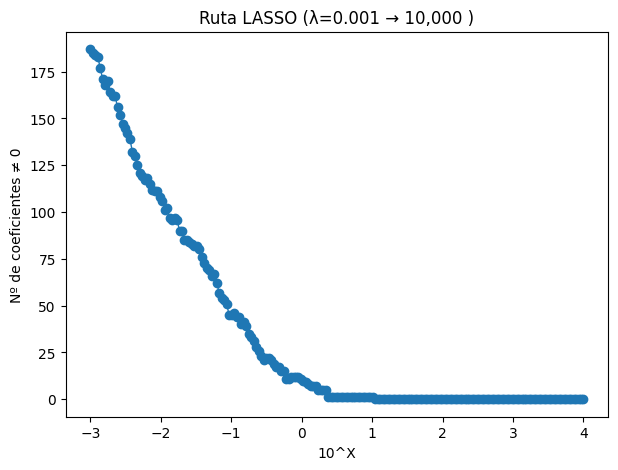

In [66]:
#Generamos las lambdas usando espacios logarítmicos de 10000 a 0.001
# es decir 10 a la 4 hasta 10 a la -3
lambdas = np.logspace(4, -3, num=200) 

# usmos la función lasso_path para calcular el camino directamente, ademas estamos usando el Z high dimension sin interacciones
alphas, coefs, _ = lasso_path(Zbase_flex, y, alphas=lambdas, max_iter=10000)

# número de coef ≠ 0 (no incluye intercepto)
nonzero_counts = (coefs != 0).sum(axis=0)

# gráfico
plt.figure(figsize=(7,5))
plt.plot(np.log10(alphas), nonzero_counts, marker='o', linewidth=1)
plt.xlabel("10^X")
plt.ylabel("Nº de coeficientes ≠ 0")
plt.title("Ruta LASSO (λ=0.001 → 10,000 )")
plt.show()